SIN-392 - Introdução ao Processamento Digital de Imagens (2022-1)

# Aula 12 - Morfologia Matemática II

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-as-bibliotecas-necessárias" data-toc-modified-id="Importando-as-bibliotecas-necessárias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando as bibliotecas necessárias</a></span></li><li><span><a href="#Construindo-imagens-binárias-simples" data-toc-modified-id="Construindo-imagens-binárias-simples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Construindo imagens binárias simples</a></span></li><li><span><a href="#Transformada-Hit-or-Miss" data-toc-modified-id="Transformada-Hit-or-Miss-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transformada Hit or Miss</a></span><ul class="toc-item"><li><span><a href="#Detectando-quadrados-com-tamanho-3x3-que-NÂO-fazem-parte-de-algum-componente-conectado-maior." data-toc-modified-id="Detectando-quadrados-com-tamanho-3x3-que-NÂO-fazem-parte-de-algum-componente-conectado-maior.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Detectando quadrados com tamanho 3x3 que NÂO fazem parte de algum componente conectado maior.</a></span></li><li><span><a href="#Detectando-quadrados-com-tamanho-3x3-que-PODEM-fazer-parte-de-algum-componente-conectado-maior." data-toc-modified-id="Detectando-quadrados-com-tamanho-3x3-que-PODEM-fazer-parte-de-algum-componente-conectado-maior.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Detectando quadrados com tamanho 3x3 que PODEM fazer parte de algum componente conectado maior.</a></span></li><li><span><a href="#Detecção-de-cantos-usando-a-Transformada-Hit-or-Miss" data-toc-modified-id="Detecção-de-cantos-usando-a-Transformada-Hit-or-Miss-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Detecção de cantos usando a Transformada Hit-or-Miss</a></span><ul class="toc-item"><li><span><a href="#Implementação-da-Transformada-Hit-or-miss-do-princípio" data-toc-modified-id="Implementação-da-Transformada-Hit-or-miss-do-princípio-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Implementação da Transformada Hit-or-miss do princípio</a></span></li><li><span><a href="#implementação-da-Transformada-Hit-or-miss-na-biblioteca-SciPy" data-toc-modified-id="implementação-da-Transformada-Hit-or-miss-na-biblioteca-SciPy-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>implementação da Transformada Hit-or-miss na biblioteca SciPy</a></span><ul class="toc-item"><li><span><a href="#Plotando-as-imagens" data-toc-modified-id="Plotando-as-imagens-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>Plotando as imagens</a></span></li></ul></li></ul></li><li><span><a href="#Detecção-de-pontos-extremos-usando-a-transformada-Hit-or-Miss" data-toc-modified-id="Detecção-de-pontos-extremos-usando-a-transformada-Hit-or-Miss-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Detecção de pontos extremos usando a transformada Hit-or-Miss</a></span></li><li><span><a href="#Implementação-da-Transformada-Hit-or-miss-do-princípio" data-toc-modified-id="Implementação-da-Transformada-Hit-or-miss-do-princípio-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Implementação da Transformada Hit-or-miss do princípio</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plotando-as-imagens" data-toc-modified-id="Plotando-as-imagens-3.5.0.1"><span class="toc-item-num">3.5.0.1&nbsp;&nbsp;</span>Plotando as imagens</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bibliografia" data-toc-modified-id="Bibliografia-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bibliografia</a></span></li></ul></div>

## Importando as bibliotecas necessárias
---

In [1]:
%matplotlib notebook
import numpy as np

from scipy import ndimage

from skimage import img_as_float, filters, morphology, data
import matplotlib.pyplot as plt

## Construindo imagens binárias simples
---

In [2]:
img_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

img_1 = img_1.astype(bool)

In [3]:
img_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 0, 1, 1, 0, 0],
                  [0, 0, 0, 1, 1, 0, 0, 0],
                  [0, 0, 0, 1, 1, 0, 0, 0],
                  [0, 1, 0, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

img_2 = img_2.astype(bool)

In [4]:
img_3 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 0, 0, 1, 0, 0],
                  [0, 1, 0, 1, 0, 1, 1, 0],
                  [0, 0, 0, 1, 0, 1, 0, 0],
                  [0, 1, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]], dtype=bool)

img_3 = img_3.astype(bool)

## Transformada Hit or Miss
----
* Definir dois elementos estruturantes, um para o hit e outro para o miss. 
* No hit os 1's determinam onde ocorre um acerto (hit). 
* No miss, os 1's determinam onde ocorre um erro (miss). 
* Coordenadas com 0's tanto no ee hit quando no ee miss são considaradas "don't care", ou seja, não importa se houve acerto ou erro.

<IPython.core.display.Javascript object>


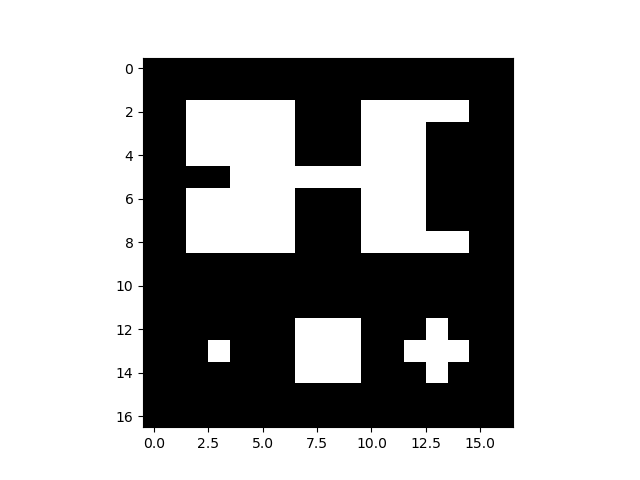

In [5]:
img = img_1

### Plota a imagem
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

### Detectando quadrados com tamanho 3x3 que NÂO fazem parte de algum componente conectado maior. 

In [6]:
# Elementos estruturantes para detectar objetos quadrados com tamanho 3x3,
# que NÃO fazem parte de nenhum componente conectado maior. 
ee_hit_1 = np.array([[0, 0, 0, 0, 0],
                     [0, 1, 1, 1, 0],
                     [0, 1, 1, 1, 0],
                     [0, 1, 1, 1, 0],
                     [0, 0, 0, 0, 0]])

ee_miss_1 = np.array([[1, 1, 1, 1, 1],
                      [1, 0, 0, 0, 1],
                      [1, 0, 0, 0, 1],
                      [1, 0, 0, 0, 1],
                      [1, 1, 1, 1, 1]])

In [7]:
img_hit_miss_1 = np.logical_and(morphology.binary_erosion(img, ee_hit_1), 
                                morphology.binary_erosion(~img, ee_miss_1))

### Detectando quadrados com tamanho 3x3 que PODEM fazer parte de algum componente conectado maior. 

In [8]:
# Elementos estruturantes para detectar objetos quadrados com tamanho 3x3,
# que PODEM fazer parte de nenhum componente conectado maior. 
ee_hit_2 = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])

ee_miss_2 = np.array([[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 0]])                      

In [9]:
img_hit_miss_2 = np.logical_and(morphology.binary_erosion(img, ee_hit_2), 
                                morphology.binary_erosion(~img, ee_miss_2))

<IPython.core.display.Javascript object>


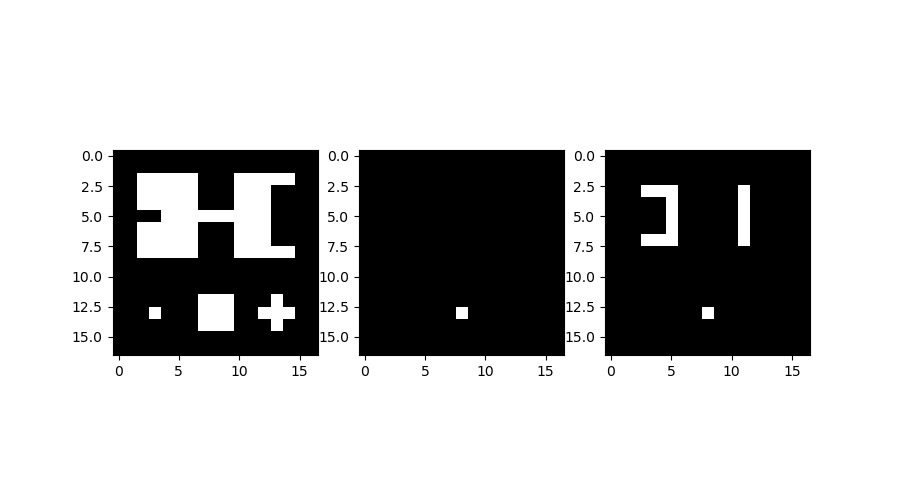

In [10]:
plt.figure(figsize=(9, 5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_hit_miss_1, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_hit_miss_2, cmap='gray')

plt.show()

### Detecção de cantos usando a Transformada Hit-or-Miss

<IPython.core.display.Javascript object>


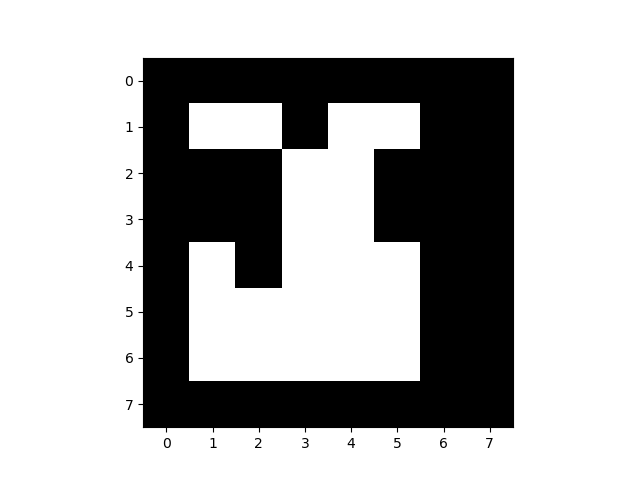

In [11]:
img = img_2

### Plota a imagem
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

In [12]:
ee_sup_esq_hit = np.array([[0, 0, 0],
                           [0, 1, 1],
                           [0, 1, 0]])
ee_sup_esq_miss =  np.array([[1, 1, 0],
                             [1, 0, 0],
                             [0, 0, 0]])

ee_inf_esq_hit =  np.array([[0, 1, 0],
                            [0, 1, 1],
                            [0, 0, 0]])
ee_inf_esq_miss =  np.array([[0, 0, 0],
                             [1, 0, 0],
                             [1, 1, 0]])

ee_sup_dir_hit =  np.array([[0, 0, 0],
                            [1, 1, 0],
                            [0, 1, 0]])
ee_sup_dir_miss =  np.array([[0, 1, 1],
                             [0, 0, 1],
                             [0, 0, 0]])

ee_inf_dir_hit =  np.array([[0, 1, 0],
                            [1, 1, 0],
                            [0, 0, 0]])
ee_inf_dir_miss =  np.array([[0, 0, 0],
                             [0, 0, 1],
                             [0, 1, 1]])

ee_hit_list = [ee_sup_esq_hit, ee_inf_esq_hit, ee_sup_dir_hit, ee_inf_dir_hit]
ee_miss_list = [ee_sup_esq_miss, ee_inf_esq_miss, ee_sup_dir_miss, ee_inf_dir_miss]

#### Implementação da Transformada Hit-or-miss do princípio

In [13]:
img_hit_miss_list = []

img_hit_miss = np.zeros(img.shape)

for ee_hit, ee_miss in zip(ee_hit_list, ee_miss_list):
    
    img_hit_miss_temp = np.logical_and(morphology.binary_erosion(img, ee_hit), morphology.binary_erosion(~img, ee_miss))
   
    img_hit_miss_list.append(img_hit_miss_temp)
    
    img_hit_miss = np.logical_or(img_hit_miss, img_hit_miss_temp)

<IPython.core.display.Javascript object>


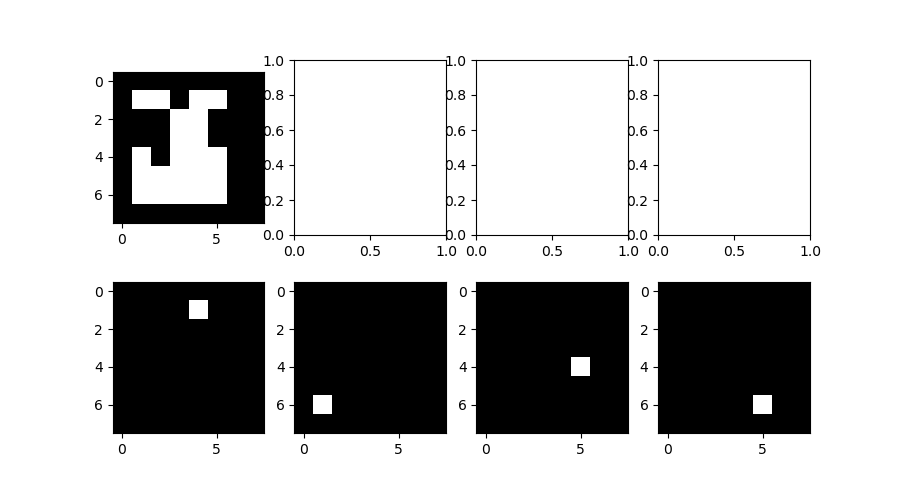

In [14]:
fig, ax  = plt.subplots(2, 4, figsize=(9,5))

img_ = ax[0,0].imshow(img, cmap='gray')

for i, img_hit_miss_temp in enumerate(img_hit_miss_list):

    img_ = ax[1,i].imshow(img_hit_miss_temp, cmap='gray')
    
plt.show()

<IPython.core.display.Javascript object>


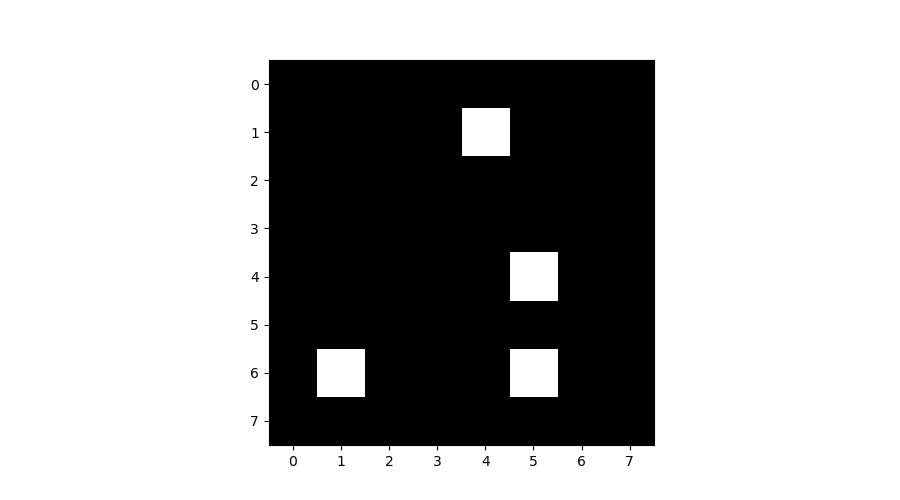

In [15]:
plt.figure(figsize=(9,5))

plt.imshow(img_hit_miss, cmap='gray')

plt.show()

#### implementação da Transformada Hit-or-miss na biblioteca SciPy

In [16]:
img_hit_miss_list = []

img_hit_miss = np.zeros(img.shape)

for ee_hit, ee_miss in zip(ee_hit_list, ee_miss_list):
    img_hit_miss_temp = ndimage.binary_hit_or_miss(img, ee_hit, ee_miss)
    
    img_hit_miss_list.append(img_hit_miss_temp)
    
    img_hit_miss = np.logical_or(img_hit_miss, img_hit_miss_temp)

##### Plotando as imagens

<IPython.core.display.Javascript object>


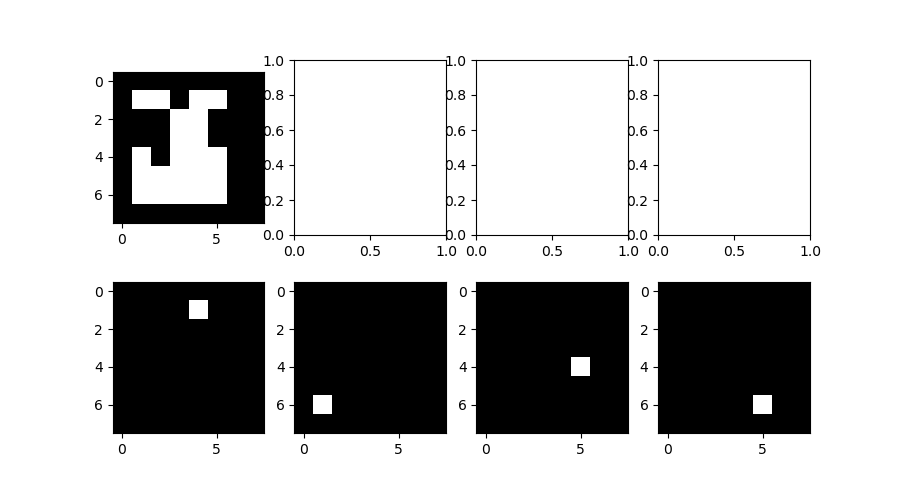

In [17]:
fig, ax  = plt.subplots(2, 4, figsize=(9,5))

img_ = ax[0,0].imshow(img, cmap='gray')

for i, img_hit_miss_temp in enumerate(img_hit_miss_list):
    img_ = ax[1,i].imshow(img_hit_miss_temp, cmap='gray')
    
plt.show()

<IPython.core.display.Javascript object>


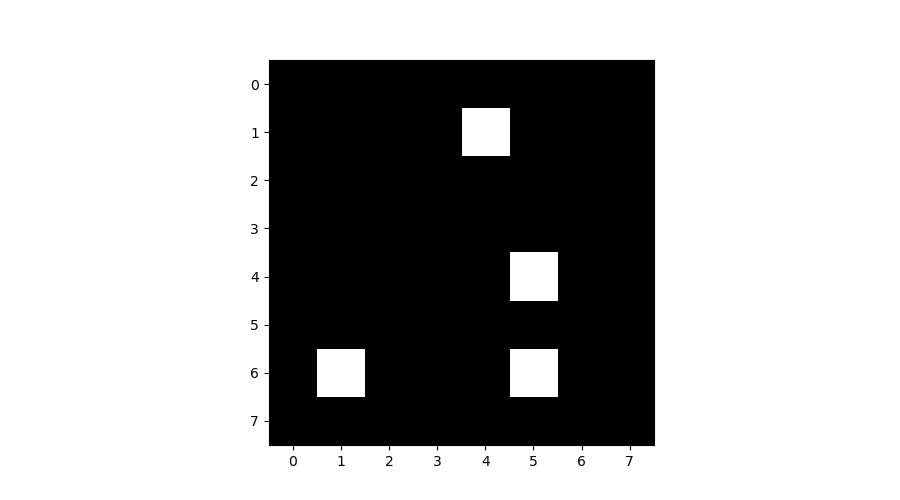

In [18]:
plt.figure(figsize=(9,5))

plt.imshow(img_hit_miss, cmap='gray')

plt.show()

### Detecção de pontos extremos usando a transformada Hit-or-Miss

<IPython.core.display.Javascript object>


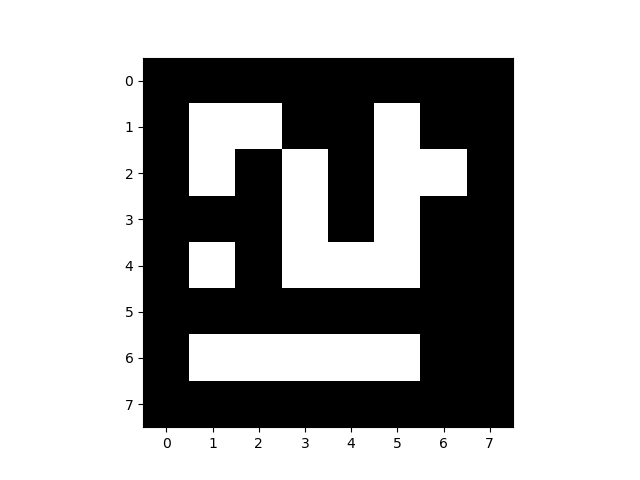

In [19]:
img = img_3

### Plota a imagem
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

In [20]:
ee_up_hit = np.array([[0, 0, 0],
                      [0, 1, 0],
                      [0, 0, 0]])
ee_up_miss =  np.array([[0, 1, 0],
                        [1, 0, 1],
                        [0, 0, 0]])

ee_down_hit =  np.array([[0, 0, 0],
                         [0, 1, 0],
                         [0, 0, 0]])
ee_down_miss =  np.array([[0, 0, 0],
                          [1, 0, 1],
                          [0, 1, 0]])

ee_left_hit =  np.array([[0, 0, 0],
                         [0, 1, 0],
                         [0, 0, 0]])
ee_left_miss =  np.array([[0, 1, 0],
                          [1, 0, 0],
                          [0, 1, 0]])

ee_right_hit =  np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]])
ee_right_miss =  np.array([[0, 1, 0],
                           [0, 0, 1],
                           [0, 1, 0]])

ee_hit_list = [ee_up_hit, ee_down_hit, ee_left_hit, ee_right_hit]
ee_miss_list = [ee_up_miss, ee_down_miss, ee_left_miss, ee_right_miss]

### Implementação da Transformada Hit-or-miss do princípio

In [21]:
img_hit_miss_list = []

img_hit_miss = np.zeros(img.shape)

for ee_hit, ee_miss in zip(ee_hit_list, ee_miss_list):
    img_hit_miss_temp = np.logical_and(morphology.binary_erosion(img, ee_hit), morphology.binary_erosion(~img, ee_miss))
    img_hit_miss_list.append(img_hit_miss_temp)
    img_hit_miss = np.logical_or(img_hit_miss, img_hit_miss_temp)

##### Plotando as imagens

<IPython.core.display.Javascript object>


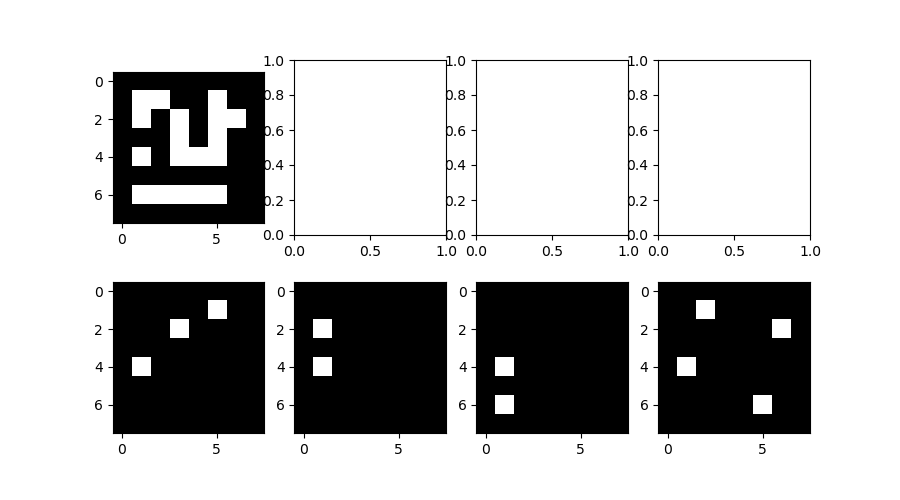

In [22]:
fig, ax  = plt.subplots(2, 4, figsize=(9,5))

img_ = ax[0,0].imshow(img, cmap='gray')

for i, img_hit_miss_temp in enumerate(img_hit_miss_list):

    img_ = ax[1,i].imshow(img_hit_miss_temp, cmap='gray')
    
plt.show()

<IPython.core.display.Javascript object>


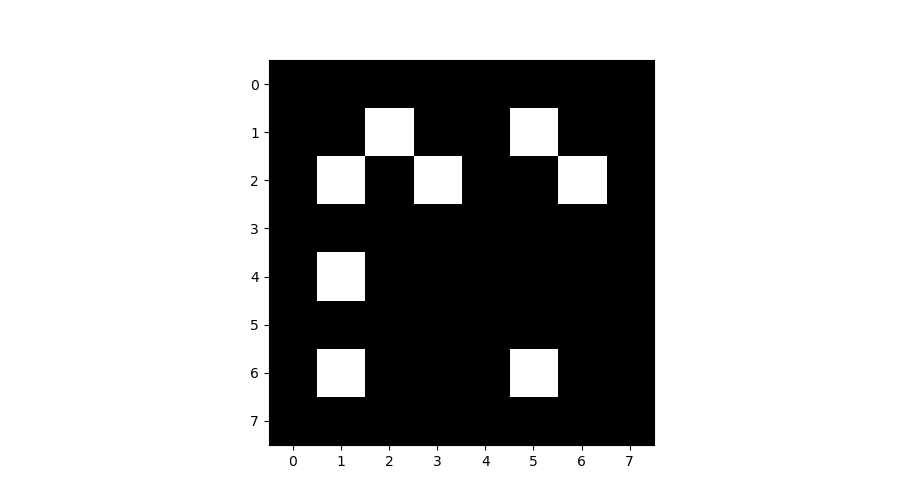

In [23]:
plt.figure(figsize=(9,5))

plt.imshow(img_hit_miss, cmap='gray')

plt.show()

## Bibliografia
---

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * Disponível para download no site do autor (Exclusivo para uso pessoal)
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

* GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

* Prof. Aldo von Wangenheim. Morfologia Matemática
    * http://www.inf.ufsc.br/~visao/morfologia.pdf

* Prof. James Facon. A Morfologia Matemática e suas Aplicações em Processamento de Imagens - Minicurso – WVC 2011
    * http://www.ppgia.pucpr.br/~facon/Books/2011WVCMinicurso2Morfo.pdf 

* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
    
* The USC-SIPI Image Database.    
    * http://sipi.usc.edu/database/database.php
    
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * Disponível em: http://scipy-lectures.org/

* scikit-image. Documentação.
    * https://scikit-image.org/docs/dev/index.html

* scikit-image. Documentação. Módulo 'morphology'. 
    * https://scikit-image.org/docs/dev/api/skimage.morphology.html
    
* Morphological Filtering 
    * https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html
    
* OpenCV. Hit-or-Miss.
    * https://docs.opencv.org/3.4/db/d06/tutorial_hitOrMiss.html
    
* NumPy. Documentação.
    * https://numpy.org/doc/stable/